In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
pip install transformers

In [3]:
pip install xformers

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline
from sklearn.metrics import confusion_matrix

In [5]:
bumble = pd.read_csv('/content/drive/MyDrive/Dating_App/Google Reviews/bumble_new.csv')
hinge = pd.read_csv('/content/drive/MyDrive/Dating_App/Google Reviews/hinge_new.csv')
matchdating = pd.read_csv('/content/drive/MyDrive/Dating_App/Google Reviews/match_new.csv')
tinder = pd.read_csv('/content/drive/MyDrive/Dating_App/Google Reviews/tinder_new.csv')

# Applying RoBERTa

In [6]:
sa = pipeline("sentiment-analysis", top_k = None,
              model = "cardiffnlp/twitter-roberta-base-sentiment-latest",
              device = 0, padding = True, truncation = True,
              max_length = 512,
              verbose = -1)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Bumble

In [41]:
predicted_label = []
n = 0
# Prediction for bumble
for i in bumble['content']:
  res = sa(str(i))
  highest_score_index = max(range(len(res[0])), key=lambda i: res[0][i]['score'])
  predicted_label.append(res[0][highest_score_index]['label'])

  print(n, end=' ')
  n += 1

In [10]:
bumble['RoBERTa Prediction'] = predicted_label

In [11]:
bumble.to_csv('/content/drive/MyDrive/Dating_App/Google Reviews/bumble_new.csv', index=False)

### Hinge

In [42]:
hinge['content'] = hinge['content'].fillna('')

predicted_label = []
n = 0
# Prediction for bumble
for i in hinge['content']:
  res = sa(i)
  highest_score_index = max(range(len(res[0])), key=lambda i: res[0][i]['score'])
  predicted_label.append(res[0][highest_score_index]['label'])

  print(n, end=' ')
  n += 1

hinge['Roberta Prediction'] = predicted_label
hinge.to_csv('/content/drive/MyDrive/Dating_App/Google Reviews/hinge_new.csv', index=False)

### Match

In [43]:
matchdating['content'] = matchdating['content'].fillna('')

predicted_label = []
n = 0
# Prediction for bumble
for i in matchdating['content']:
  res = sa(i)
  highest_score_index = max(range(len(res[0])), key=lambda i: res[0][i]['score'])
  predicted_label.append(res[0][highest_score_index]['label'])

  print(n, end=' ')
  n += 1

matchdating['Roberta Prediction'] = predicted_label
matchdating.to_csv('/content/drive/MyDrive/Dating_App/Google Reviews/match_new.csv', index=False)

### Tinder

In [44]:
tinder['content'] = tinder['content'].fillna('')

predicted_label = []
n = 0
# Prediction for bumble
for i in tinder['content']:
  res = sa(i)
  highest_score_index = max(range(len(res[0])), key=lambda i: res[0][i]['score'])
  predicted_label.append(res[0][highest_score_index]['label'])

  print(n, end=' ')
  n += 1

tinder['Roberta Prediction'] = predicted_label
tinder.to_csv('/content/drive/MyDrive/Dating_App/Google Reviews/tinder_new.csv', index=False)

### Save Results in df

In [9]:
# Add actual label

bumble['actual label'] = bumble['score'].apply(lambda x: 'positive' if x>=4 else ('neutral' if x==3 else 'negative'))
hinge['actual label'] = hinge['score'].apply(lambda x: 'positive' if x>=4 else ('neutral' if x==3 else 'negative'))
matchdating['actual label'] = matchdating['score'].apply(lambda x: 'positive' if x>=4 else ('neutral' if x==3 else 'negative'))
tinder['actual label'] = tinder['score'].apply(lambda x: 'positive' if x>=4 else ('neutral' if x==3 else 'negative'))

In [15]:
# Drop rows where content is null

bumble = bumble.dropna(subset=['content'])
hinge = hinge.dropna(subset=['content'])
matchdating = matchdating.dropna(subset=['content'])
tinder = tinder.dropna(subset=['content'])

# And save in df

bumble.to_csv('/content/drive/MyDrive/Dating_App/Google Reviews/bumble_new.csv', index=False)
hinge.to_csv('/content/drive/MyDrive/Dating_App/Google Reviews/hinge_new.csv', index=False)
matchdating.to_csv('/content/drive/MyDrive/Dating_App/Google Reviews/match_new.csv', index=False)
tinder.to_csv('/content/drive/MyDrive/Dating_App/Google Reviews/tinder_new.csv', index=False)

# Analyzing Results

### BUMBLE

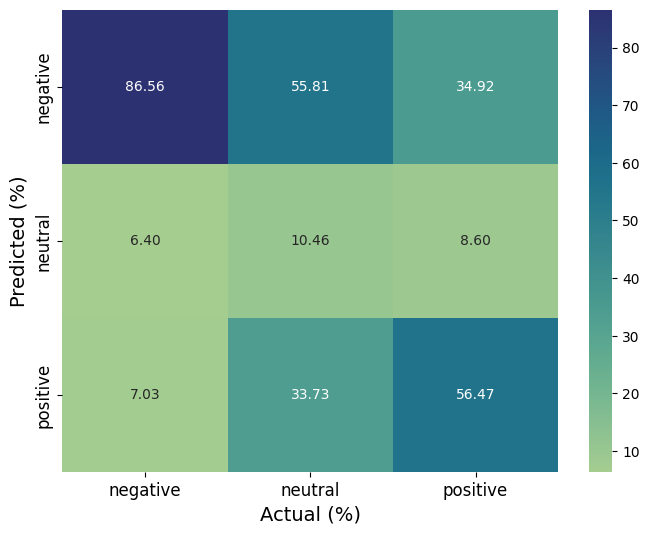

In [29]:
conf_matrix = pd.crosstab(bumble['actual label'], bumble['vader_prediction'])
conf_matrix_percent = conf_matrix / conf_matrix.sum() * 100

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap='crest')
plt.xlabel('Actual (%)', fontsize=14)
plt.ylabel('Predicted (%)', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()

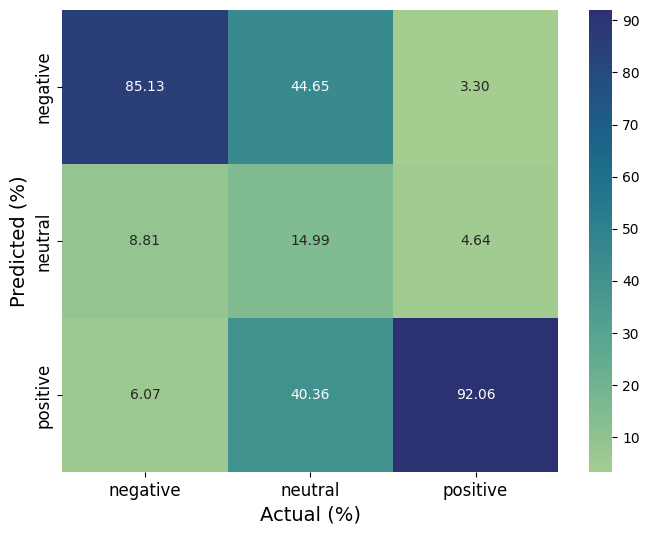

In [30]:
conf_matrix = pd.crosstab(bumble['actual label'], bumble['RoBERTa Prediction'])
conf_matrix_percent = conf_matrix / conf_matrix.sum() * 100

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap='crest')
plt.xlabel('Actual (%)', fontsize=14)
plt.ylabel('Predicted (%)', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()

In [31]:
from sklearn.metrics import accuracy_score, f1_score, hamming_loss


# Calculate accuracy, F1 micro, F1 macro, and Hamming loss
actual_labels = bumble['actual label']
vader_predictions = bumble['vader_prediction']
roberta_predictions = bumble['RoBERTa Prediction']

accuracy_actual = accuracy_score(actual_labels, vader_predictions)
f1_micro_actual = f1_score(actual_labels, vader_predictions, average='micro')
f1_macro_actual = f1_score(actual_labels, vader_predictions, average='macro')
hamming_loss_actual = hamming_loss(pd.get_dummies(actual_labels), pd.get_dummies(vader_predictions))

accuracy_roberta = accuracy_score(actual_labels, roberta_predictions)
f1_micro_roberta = f1_score(actual_labels, roberta_predictions, average='micro')
f1_macro_roberta = f1_score(actual_labels, roberta_predictions, average='macro')
hamming_loss_roberta = hamming_loss(pd.get_dummies(actual_labels), pd.get_dummies(roberta_predictions))

print("Metrics for 'vader_prediction':")
print("Accuracy:", accuracy_actual)
print("F1 Micro:", f1_micro_actual)
print("F1 Macro:", f1_macro_actual)
print("Hamming Loss:", hamming_loss_actual)
print()

print("Metrics for 'RoBERTa Prediction':")
print("Accuracy:", accuracy_roberta)
print("F1 Micro:", f1_micro_roberta)
print("F1 Macro:", f1_macro_roberta)
print("Hamming Loss:", hamming_loss_roberta)

Metrics for 'vader_prediction':
Accuracy: 0.5629917184265011
F1 Micro: 0.5629917184265011
F1 Macro: 0.4628447826414708
Hamming Loss: 0.29133885438233265

Metrics for 'RoBERTa Prediction':
Accuracy: 0.7717317361727299
F1 Micro: 0.7717317361727298
F1 Macro: 0.62719326216387
Hamming Loss: 0.15217884255151337


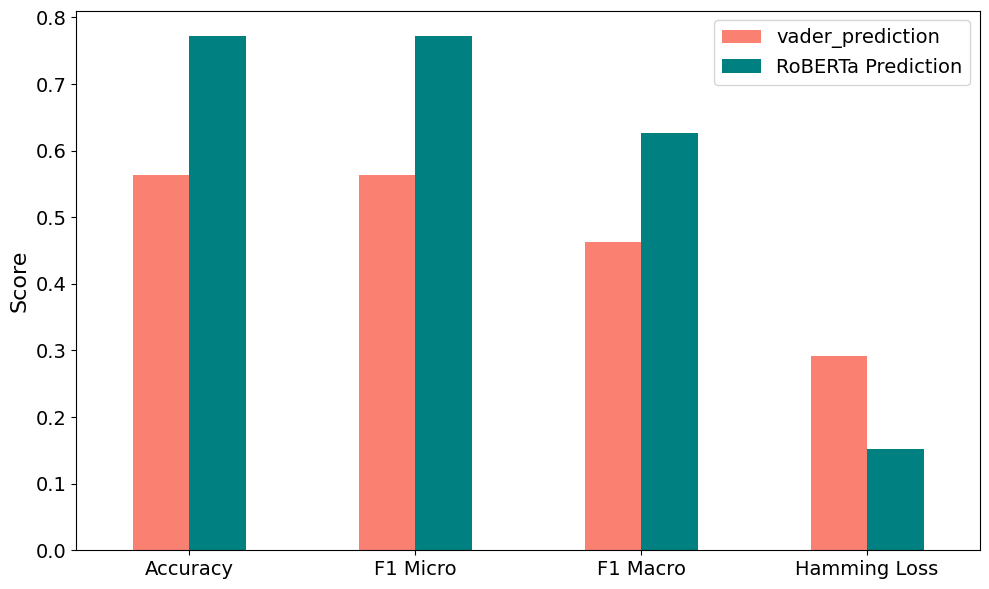

In [32]:
# Data for plotting

metrics = ['Accuracy', 'F1 Micro', 'F1 Macro', 'Hamming Loss']
methods = ['vader_prediction', 'RoBERTa Prediction']
values = [[accuracy_actual, f1_micro_actual, f1_macro_actual, hamming_loss_actual],
          [accuracy_roberta, f1_micro_roberta, f1_macro_roberta, hamming_loss_roberta]]

df = pd.DataFrame(values, columns=metrics)
df['Method'] = methods

fig, ax = plt.subplots(figsize=(10, 6))
df.set_index('Method').T.plot(kind='bar', ax=ax, color=['salmon', 'teal'])
ax.set_ylabel('Score', fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

### HINGE

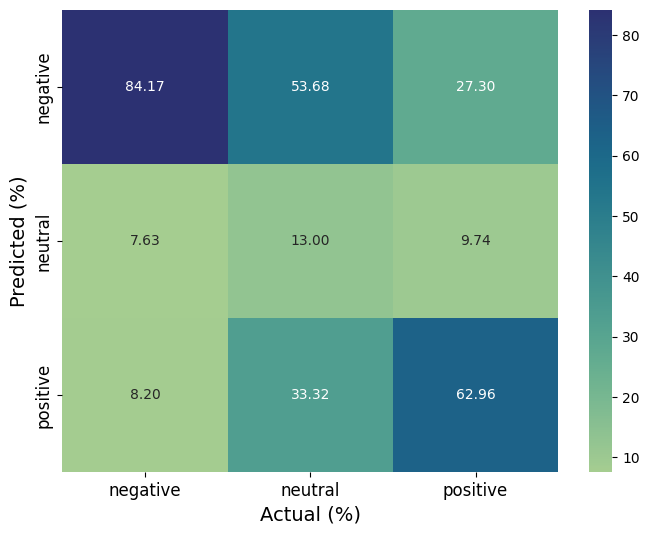

In [33]:
conf_matrix = pd.crosstab(hinge['actual label'], hinge['vader_prediction'])
conf_matrix_percent = conf_matrix / conf_matrix.sum() * 100

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap='crest')
plt.xlabel('Actual (%)', fontsize=14)
plt.ylabel('Predicted (%)', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()

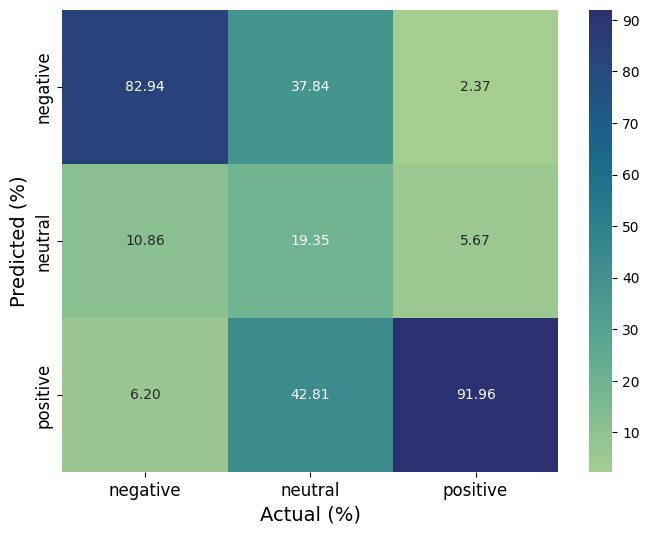

In [34]:
conf_matrix = pd.crosstab(hinge['actual label'], hinge['Roberta Prediction'])
conf_matrix_percent = conf_matrix / conf_matrix.sum() * 100

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap='crest')
plt.xlabel('Actual (%)', fontsize=14)
plt.ylabel('Predicted (%)', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()

In [35]:
from sklearn.metrics import accuracy_score, f1_score, hamming_loss


# Calculate accuracy, F1 micro, F1 macro, and Hamming loss
actual_labels = hinge['actual label']
vader_predictions = hinge['vader_prediction']
roberta_predictions = hinge['Roberta Prediction']

accuracy_actual = accuracy_score(actual_labels, vader_predictions)
f1_micro_actual = f1_score(actual_labels, vader_predictions, average='micro')
f1_macro_actual = f1_score(actual_labels, vader_predictions, average='macro')
hamming_loss_actual = hamming_loss(pd.get_dummies(actual_labels), pd.get_dummies(vader_predictions))

accuracy_roberta = accuracy_score(actual_labels, roberta_predictions)
f1_micro_roberta = f1_score(actual_labels, roberta_predictions, average='micro')
f1_macro_roberta = f1_score(actual_labels, roberta_predictions, average='macro')
hamming_loss_roberta = hamming_loss(pd.get_dummies(actual_labels), pd.get_dummies(roberta_predictions))

print("Metrics for 'vader_prediction':")
print("Accuracy:", accuracy_actual)
print("F1 Micro:", f1_micro_actual)
print("F1 Macro:", f1_macro_actual)
print("Hamming Loss:", hamming_loss_actual)
print()

print("Metrics for 'RoBERTa Prediction':")
print("Accuracy:", accuracy_roberta)
print("F1 Micro:", f1_micro_roberta)
print("F1 Macro:", f1_macro_roberta)
print("Hamming Loss:", hamming_loss_roberta)

Metrics for 'vader_prediction':
Accuracy: 0.601644398766701
F1 Micro: 0.601644398766701
F1 Macro: 0.4859807795288962
Hamming Loss: 0.2655704008221994

Metrics for 'RoBERTa Prediction':
Accuracy: 0.7901177958731915
F1 Micro: 0.7901177958731915
F1 Macro: 0.6448556867477
Hamming Loss: 0.13992146941787229


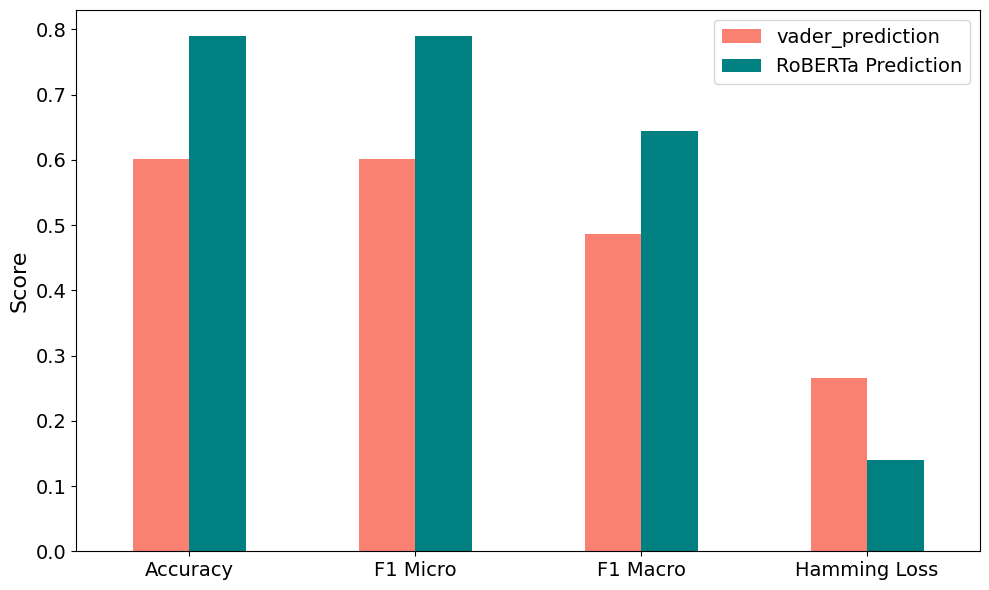

In [36]:
# Data for plotting

metrics = ['Accuracy', 'F1 Micro', 'F1 Macro', 'Hamming Loss']
methods = ['vader_prediction', 'RoBERTa Prediction']
values = [[accuracy_actual, f1_micro_actual, f1_macro_actual, hamming_loss_actual],
          [accuracy_roberta, f1_micro_roberta, f1_macro_roberta, hamming_loss_roberta]]

df = pd.DataFrame(values, columns=metrics)
df['Method'] = methods

fig, ax = plt.subplots(figsize=(10, 6))
df.set_index('Method').T.plot(kind='bar', ax=ax, color=['salmon', 'teal'])
ax.set_ylabel('Score', fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

### MATCH

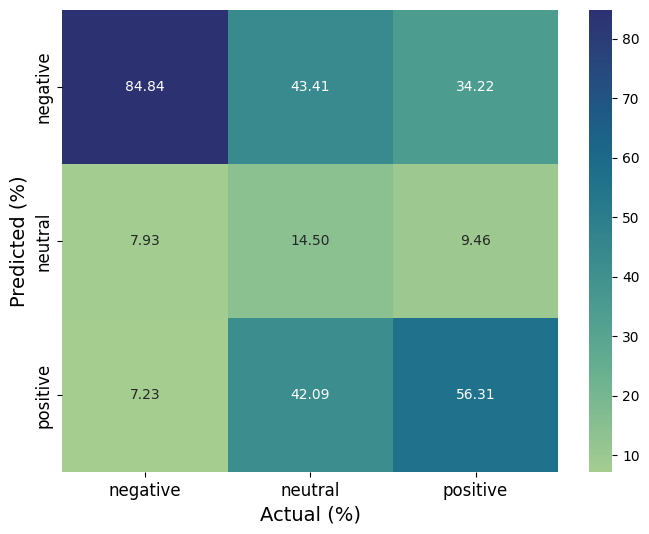

In [37]:
conf_matrix = pd.crosstab(matchdating['actual label'], matchdating['vader_prediction'])
conf_matrix_percent = conf_matrix / conf_matrix.sum() * 100

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap='crest')
plt.xlabel('Actual (%)', fontsize=14)
plt.ylabel('Predicted (%)', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()

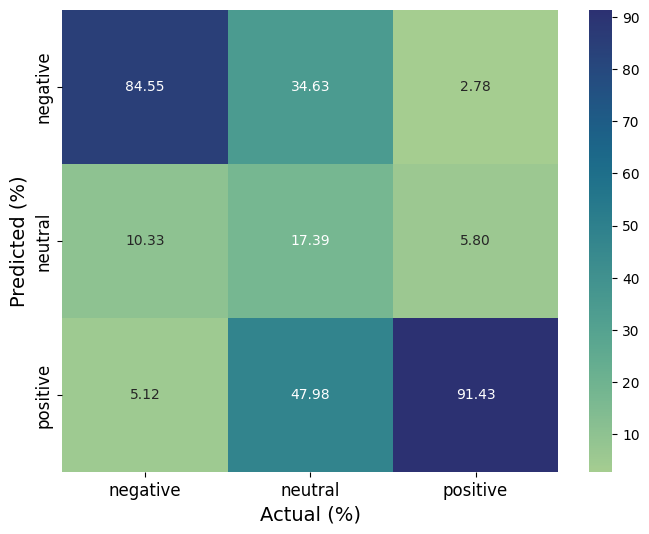

In [38]:
conf_matrix = pd.crosstab(matchdating['actual label'], matchdating['Roberta Prediction'])
conf_matrix_percent = conf_matrix / conf_matrix.sum() * 100

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap='crest')
plt.xlabel('Actual (%)', fontsize=14)
plt.ylabel('Predicted (%)', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()

In [39]:
from sklearn.metrics import accuracy_score, f1_score, hamming_loss


# Calculate accuracy, F1 micro, F1 macro, and Hamming loss
actual_labels = matchdating['actual label']
vader_predictions = matchdating['vader_prediction']
roberta_predictions = matchdating['Roberta Prediction']

accuracy_actual = accuracy_score(actual_labels, vader_predictions)
f1_micro_actual = f1_score(actual_labels, vader_predictions, average='micro')
f1_macro_actual = f1_score(actual_labels, vader_predictions, average='macro')
hamming_loss_actual = hamming_loss(pd.get_dummies(actual_labels), pd.get_dummies(vader_predictions))

accuracy_roberta = accuracy_score(actual_labels, roberta_predictions)
f1_micro_roberta = f1_score(actual_labels, roberta_predictions, average='micro')
f1_macro_roberta = f1_score(actual_labels, roberta_predictions, average='macro')
hamming_loss_roberta = hamming_loss(pd.get_dummies(actual_labels), pd.get_dummies(roberta_predictions))

print("Metrics for 'vader_prediction':")
print("Accuracy:", accuracy_actual)
print("F1 Micro:", f1_micro_actual)
print("F1 Macro:", f1_macro_actual)
print("Hamming Loss:", hamming_loss_actual)
print()

print("Metrics for 'RoBERTa Prediction':")
print("Accuracy:", accuracy_roberta)
print("F1 Micro:", f1_micro_roberta)
print("F1 Macro:", f1_macro_roberta)
print("Hamming Loss:", hamming_loss_roberta)

Metrics for 'vader_prediction':
Accuracy: 0.5555901007337396
F1 Micro: 0.5555901007337396
F1 Macro: 0.47236612506616354
Hamming Loss: 0.29627326617750693

Metrics for 'RoBERTa Prediction':
Accuracy: 0.7529328856278241
F1 Micro: 0.7529328856278241
F1 Macro: 0.6295182477768528
Hamming Loss: 0.1647114095814506


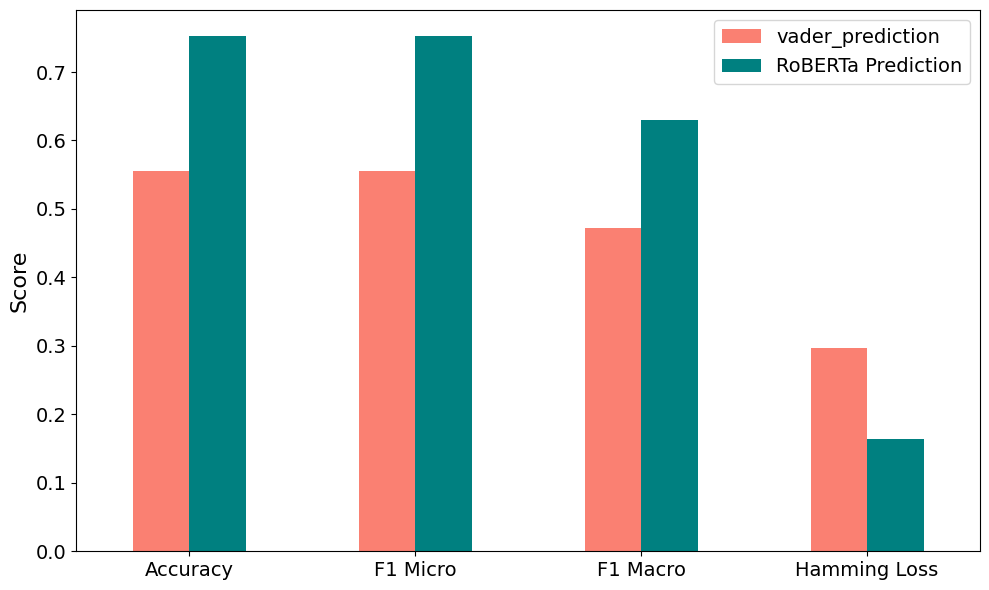

In [40]:
# Data for plotting

metrics = ['Accuracy', 'F1 Micro', 'F1 Macro', 'Hamming Loss']
methods = ['vader_prediction', 'RoBERTa Prediction']
values = [[accuracy_actual, f1_micro_actual, f1_macro_actual, hamming_loss_actual],
          [accuracy_roberta, f1_micro_roberta, f1_macro_roberta, hamming_loss_roberta]]

df = pd.DataFrame(values, columns=metrics)
df['Method'] = methods

fig, ax = plt.subplots(figsize=(10, 6))
df.set_index('Method').T.plot(kind='bar', ax=ax, color=['salmon', 'teal'])
ax.set_ylabel('Score', fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

### TINDER

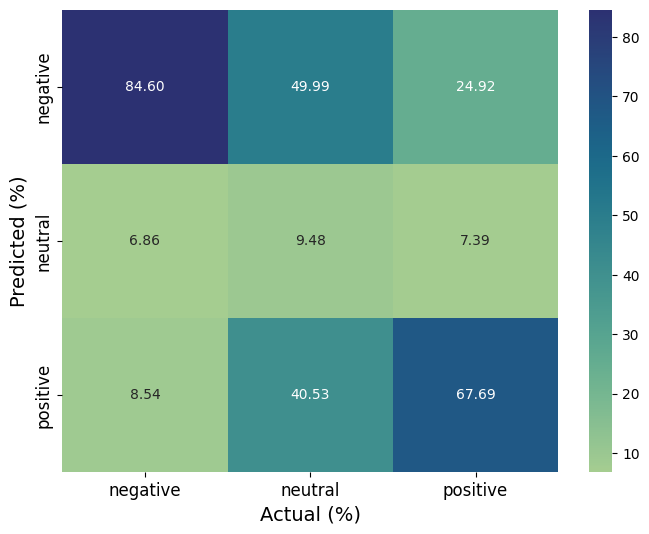

In [41]:
conf_matrix = pd.crosstab(tinder['actual label'], tinder['vader_prediction'])
conf_matrix_percent = conf_matrix / conf_matrix.sum() * 100

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap='crest')
plt.xlabel('Actual (%)', fontsize=14)
plt.ylabel('Predicted (%)', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()

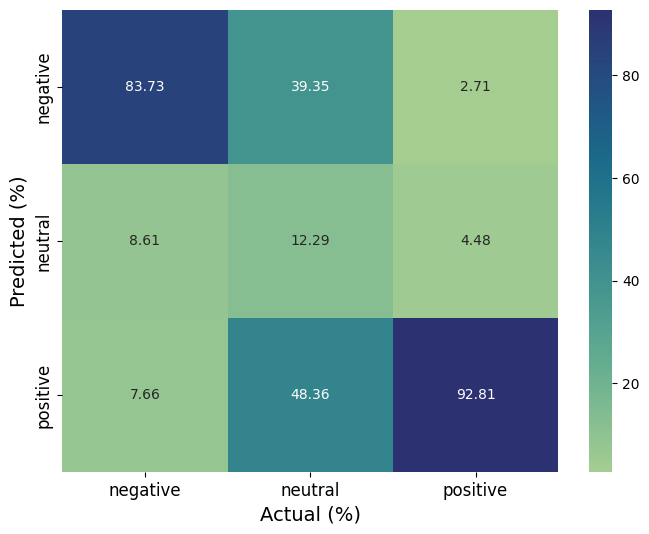

In [42]:
conf_matrix = pd.crosstab(tinder['actual label'], tinder['Roberta Prediction'])
conf_matrix_percent = conf_matrix / conf_matrix.sum() * 100

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap='crest')
plt.xlabel('Actual (%)', fontsize=14)
plt.ylabel('Predicted (%)', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()

In [43]:
from sklearn.metrics import accuracy_score, f1_score, hamming_loss


# Calculate accuracy, F1 micro, F1 macro, and Hamming loss
actual_labels = tinder['actual label']
vader_predictions = tinder['vader_prediction']
roberta_predictions = tinder['Roberta Prediction']

accuracy_actual = accuracy_score(actual_labels, vader_predictions)
f1_micro_actual = f1_score(actual_labels, vader_predictions, average='micro')
f1_macro_actual = f1_score(actual_labels, vader_predictions, average='macro')
hamming_loss_actual = hamming_loss(pd.get_dummies(actual_labels), pd.get_dummies(vader_predictions))

accuracy_roberta = accuracy_score(actual_labels, roberta_predictions)
f1_micro_roberta = f1_score(actual_labels, roberta_predictions, average='micro')
f1_macro_roberta = f1_score(actual_labels, roberta_predictions, average='macro')
hamming_loss_roberta = hamming_loss(pd.get_dummies(actual_labels), pd.get_dummies(roberta_predictions))

print("Metrics for 'vader_prediction':")
print("Accuracy:", accuracy_actual)
print("F1 Micro:", f1_micro_actual)
print("F1 Macro:", f1_macro_actual)
print("Hamming Loss:", hamming_loss_actual)
print()

print("Metrics for 'RoBERTa Prediction':")
print("Accuracy:", accuracy_roberta)
print("F1 Micro:", f1_micro_roberta)
print("F1 Macro:", f1_macro_roberta)
print("Hamming Loss:", hamming_loss_roberta)

Metrics for 'vader_prediction':
Accuracy: 0.587932545818268
F1 Micro: 0.587932545818268
F1 Macro: 0.49049459686929175
Hamming Loss: 0.2747116361211546

Metrics for 'RoBERTa Prediction':
Accuracy: 0.7515592428145279
F1 Micro: 0.7515592428145279
F1 Macro: 0.6104614958079078
Hamming Loss: 0.1656271714569814


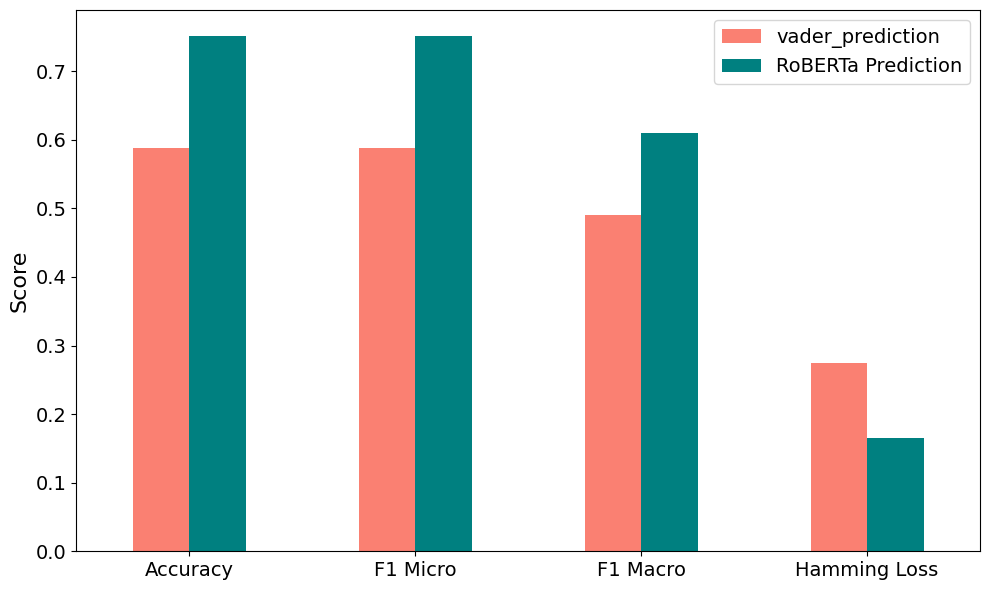

In [44]:
# Data for plotting

metrics = ['Accuracy', 'F1 Micro', 'F1 Macro', 'Hamming Loss']
methods = ['vader_prediction', 'RoBERTa Prediction']
values = [[accuracy_actual, f1_micro_actual, f1_macro_actual, hamming_loss_actual],
          [accuracy_roberta, f1_micro_roberta, f1_macro_roberta, hamming_loss_roberta]]

df = pd.DataFrame(values, columns=metrics)
df['Method'] = methods

fig, ax = plt.subplots(figsize=(10, 6))
df.set_index('Method').T.plot(kind='bar', ax=ax, color=['salmon', 'teal'])
ax.set_ylabel('Score', fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

## Word Cloud - Neutrals

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

In [54]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [55]:
stop_words = set(stopwords.words('english'))

### Bumble

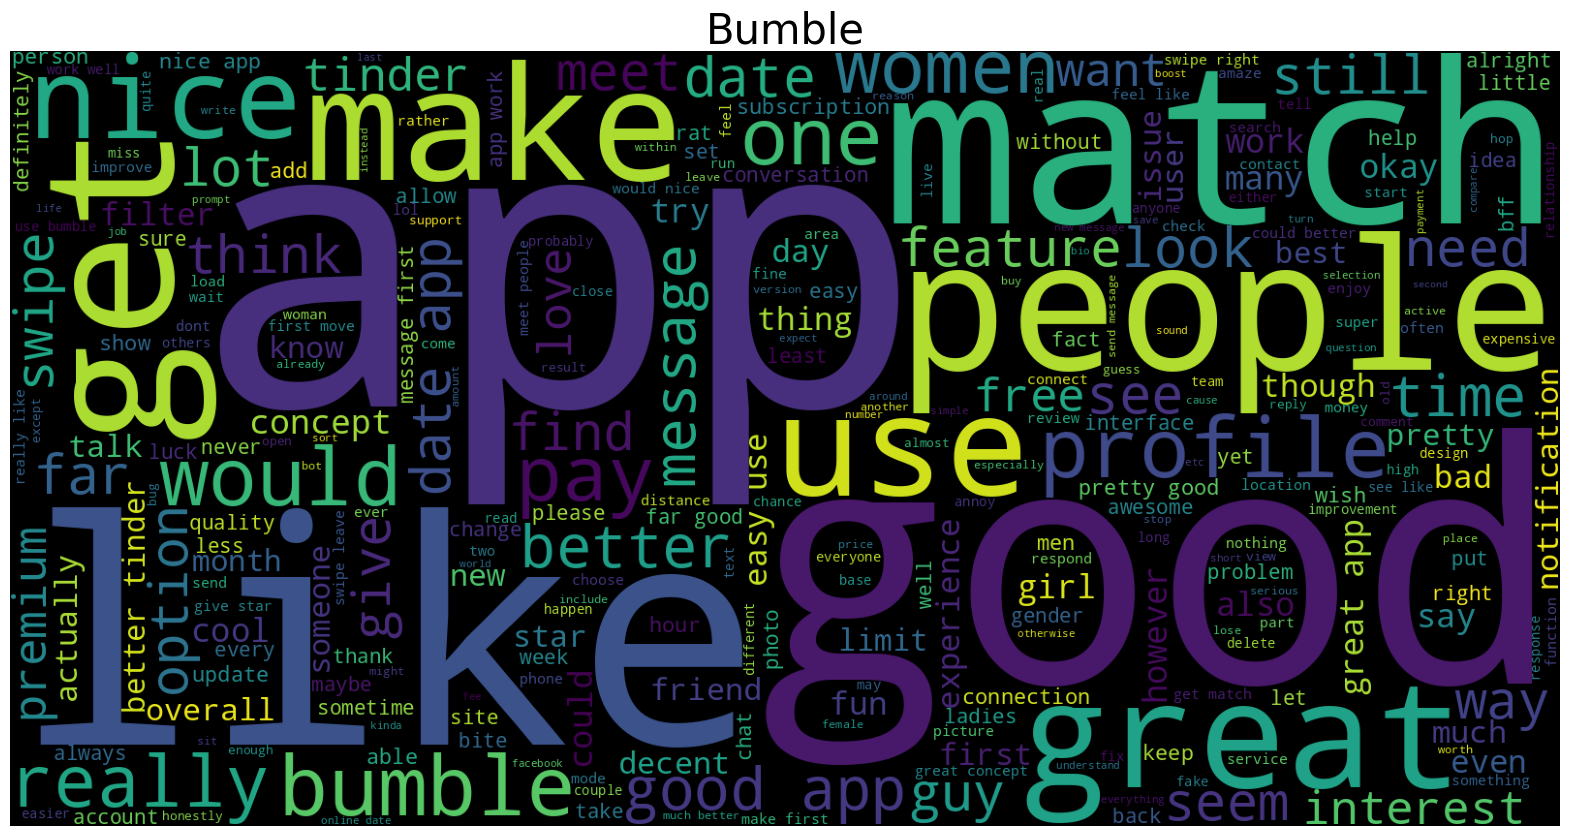

In [58]:
bumble_neutral_positive = bumble[(bumble['RoBERTa Prediction'] == 'positive')&(bumble['actual label']=='neutral')].dropna()

plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1600 , height=800 , stopwords=stop_words).generate(str(" ".join(bumble_neutral_positive.clean_text)))
plt.axis('off')
plt.title('Bumble', fontsize=30)
plt.imshow(wordcloud)
plt.show()

In [60]:
bumble[(bumble['RoBERTa Prediction'] == 'negative')&(bumble['actual label']=='neutral')]['content']

8         I've used this app on and off over the past fe...
23        Seems like unless you pay you are pretty much ...
25                                        not much response
49        Waste of time going premium tbh. App kept sugg...
64        The premium option is nice, maybe a little exp...
                                ...                        
135185    It's a good app but the backtrack feature does...
135191    There's nothing to differentiate from competit...
135203    Wish you could change the sensitivity of swipi...
135214                               Lots of fake profiles.
135221    Swiping is easy but but messaging will not wor...
Name: content, Length: 6279, dtype: object

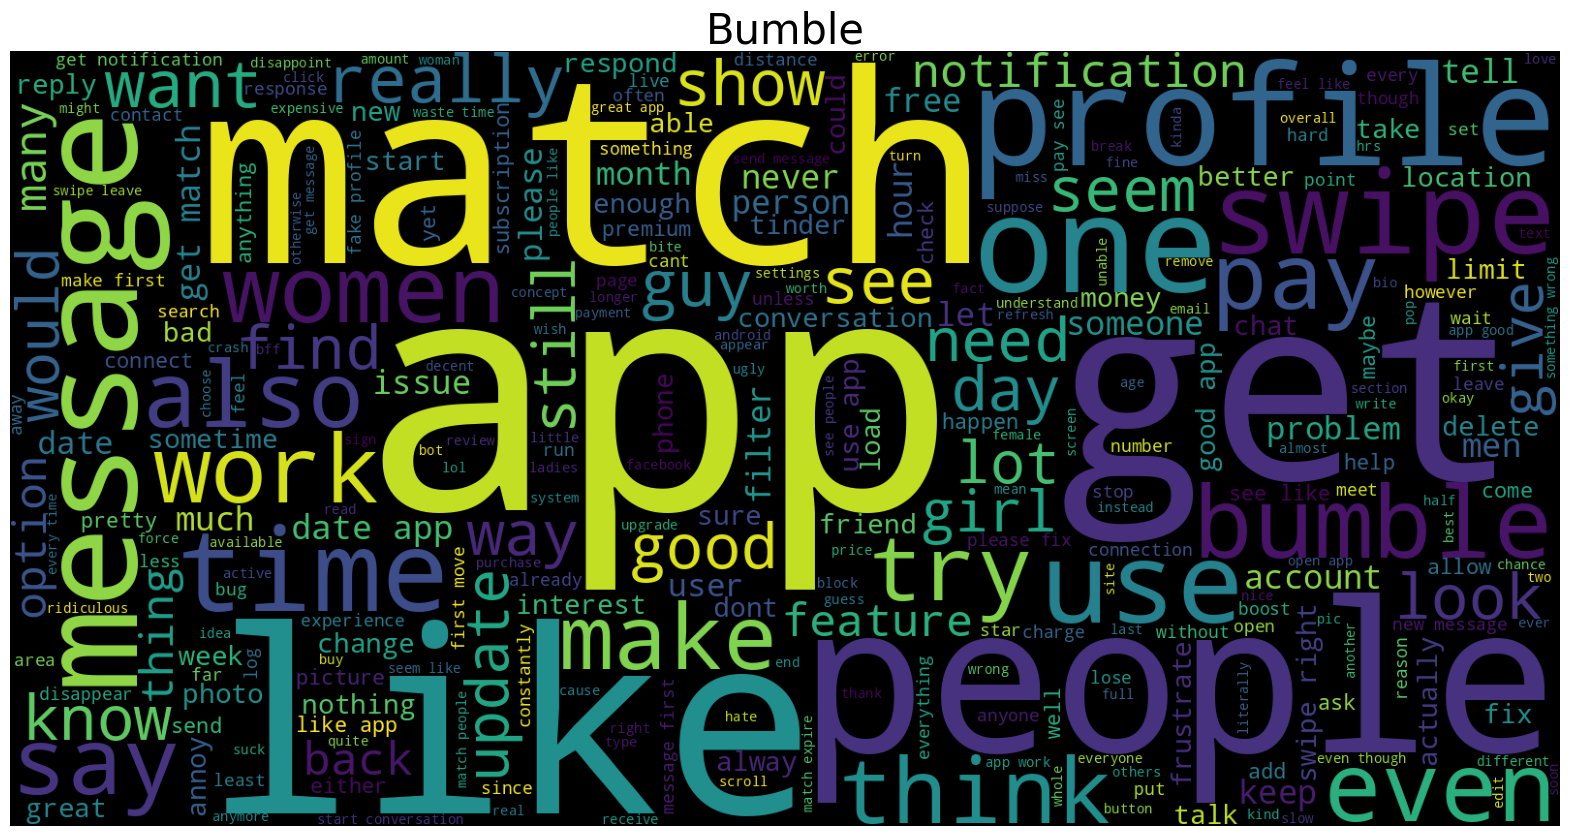

In [59]:
bumble_neutral_negative = bumble[(bumble['RoBERTa Prediction'] == 'negative')&(bumble['actual label']=='neutral')].dropna()

plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1600 , height=800 , stopwords=stop_words).generate(str(" ".join(bumble_neutral_negative.clean_text)))
plt.axis('off')
plt.title('Bumble', fontsize=30)
plt.imshow(wordcloud)
plt.show()

## Overtime

In [107]:
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates

In [87]:
def calculate_average_scores(data_frame, date_column, score_column):

    data_frame[date_column] = data_frame[date_column].astype(str)

    # Split the date and time
    data_frame[["date", 'time']] = data_frame[date_column].str.split(" ", expand=True)

    # Convert date column to datetime format
    data_frame['date'] = pd.to_datetime(data_frame['date'])

    # Create 'year-month' column
    data_frame['year-month'] = data_frame['date'].dt.strftime('%Y-%m')
    data_frame['year'] = data_frame['date'].dt.strftime('%Y')

    # Calculate average scores by year-month
    average_scores = data_frame.groupby('year-month')[score_column].mean()

    return average_scores

# Call the function
average_bumble = calculate_average_scores(bumble, 'at', 'score')
average_hinge = calculate_average_scores(hinge, 'at', 'score')
average_match = calculate_average_scores(matchdating, 'at', 'score')
average_tinder = calculate_average_scores(tinder, 'at', 'score')

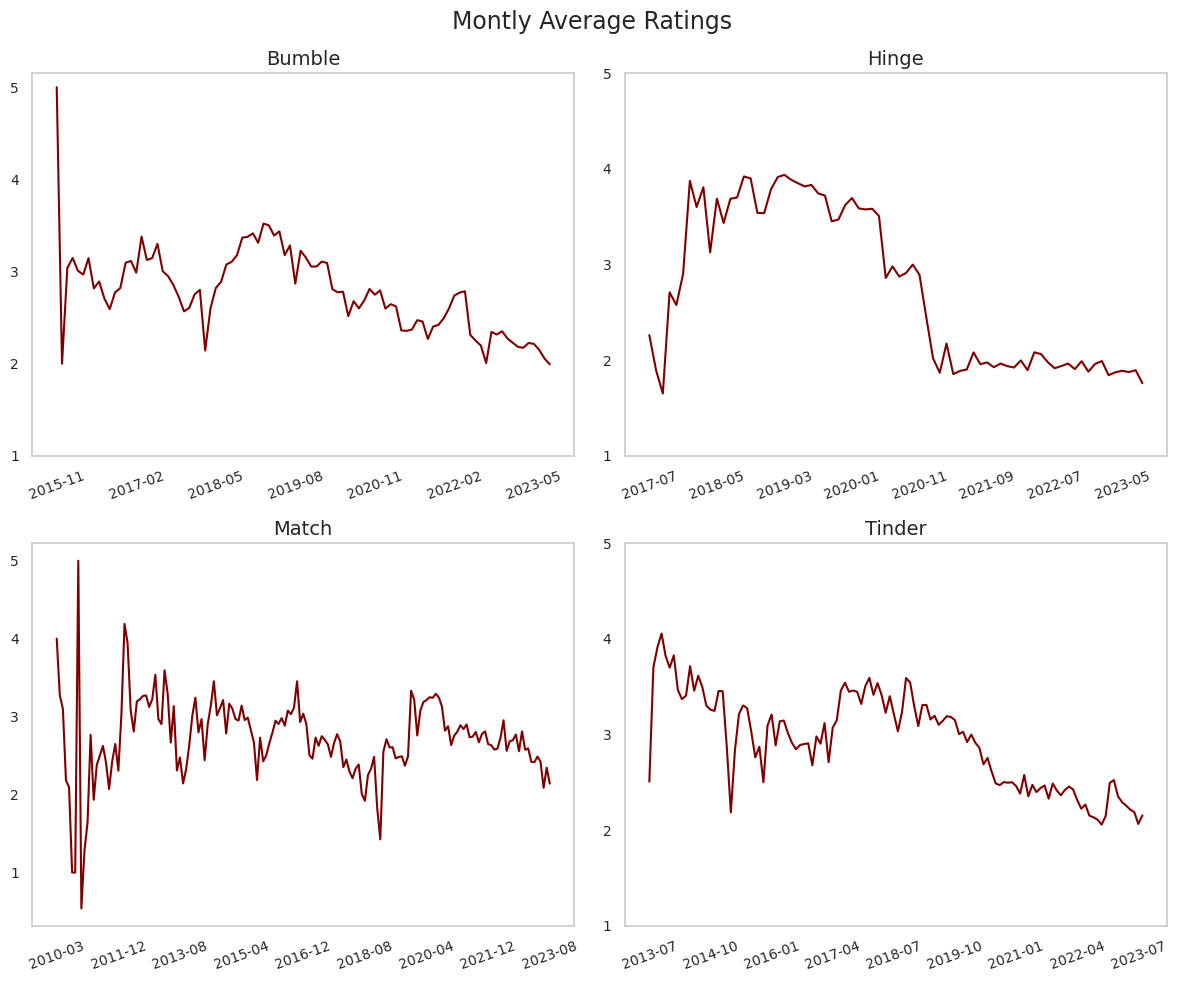

In [112]:
app_names = ['Bumble', 'Hinge', 'Match', 'Tinder']
app_avg_scores = [average_bumble, average_hinge, average_match, average_tinder]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plotting in each subplot
for idx, ax in enumerate(axes.flat):
    app_name = app_names[idx]
    app_avg = app_avg_scores[idx]

    ax.plot(app_avg, color='maroon')

    ax.xaxis.set_major_locator(MaxNLocator(nbins=9))
    ax.tick_params(labelsize=10)
    ax.set_title(app_name, fontsize=14)
    ax.grid(False)
    plt.setp(ax.get_xticklabels(), rotation=20)

    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)

    ax.set_yticks([1, 2, 3, 4, 5])

plt.suptitle('Montly Average Ratings', fontsize=17)
plt.tight_layout()
plt.show()

### Bumble

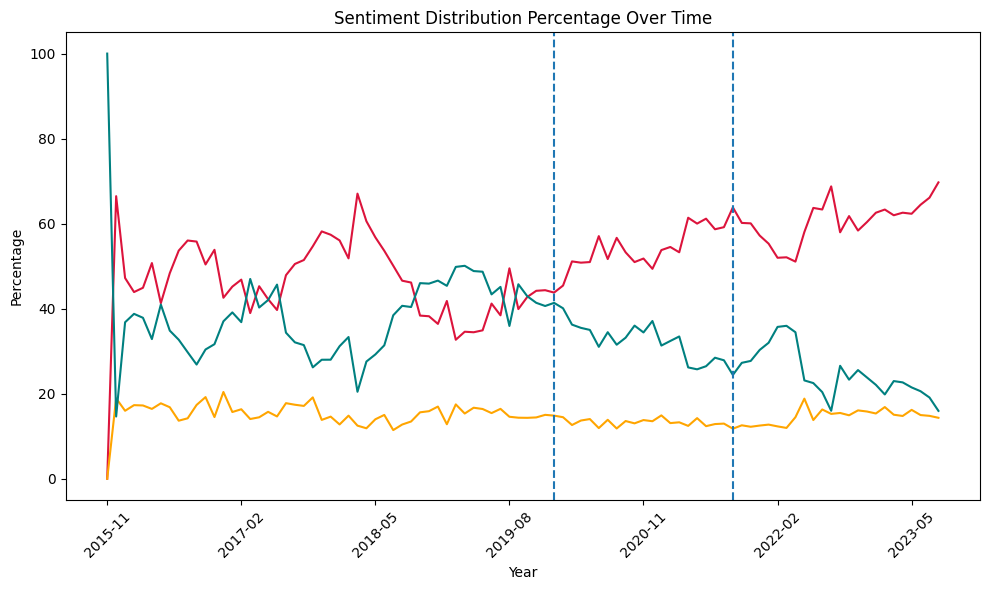

In [16]:
bumble['at'] = pd.to_datetime(bumble['at'])
bumble['month_year'] = bumble['at'].dt.to_period('M')
sentiment_percentages = bumble.groupby(['month_year', 'RoBERTa Prediction']).size().unstack(fill_value=0)
sentiment_percentages = sentiment_percentages.div(sentiment_percentages.sum(axis=1), axis=0) * 100


custom_colors = {'negative': 'crimson', 'neutral': 'orange', 'positive': 'teal'}

# Convert Period objects to strings
sentiment_percentages.index = sentiment_percentages.index.astype(str)

# Plotting
plt.figure(figsize=(10, 6))
for sentiment, color in custom_colors.items():
    plt.plot(sentiment_percentages.index, sentiment_percentages[sentiment], color=color, label=sentiment)

plt.axvline(x='2020-01', linestyle='--')
plt.axvline(x='2021-09', linestyle='--')

plt.grid(False)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution Percentage Over Time')
plt.xticks(rotation=45)

plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

In [90]:
bumble_covid = bumble[(bumble['month_year']>='2020-01')&(bumble['month_year']<='2021-09')]

### Hinge

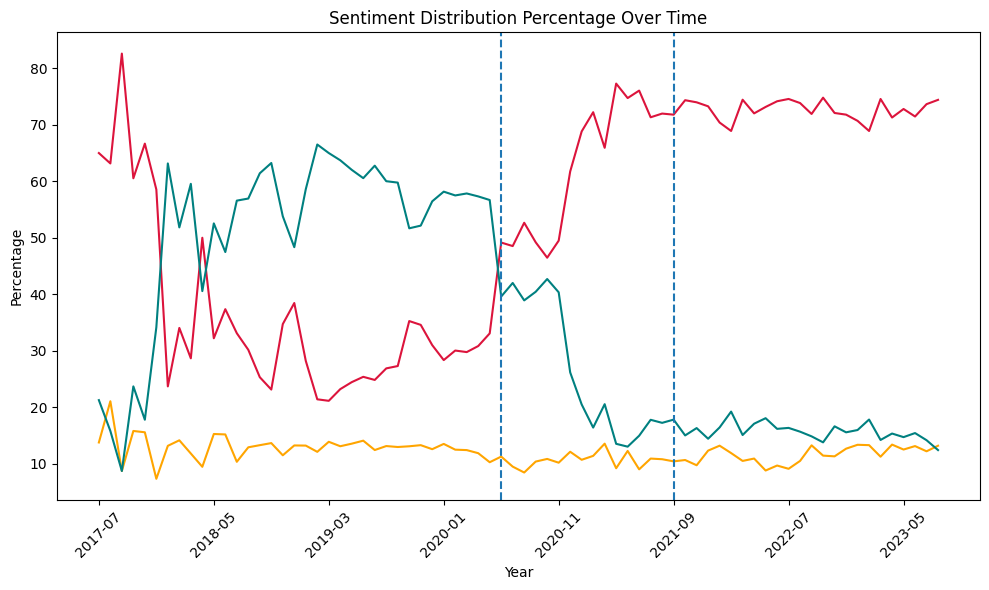

In [87]:
hinge['at'] = pd.to_datetime(hinge['at'])
hinge['month_year'] = hinge['at'].dt.to_period('M')
sentiment_percentages = hinge.groupby(['month_year', 'Roberta Prediction']).size().unstack(fill_value=0)
sentiment_percentages = sentiment_percentages.div(sentiment_percentages.sum(axis=1), axis=0) * 100


custom_colors = {'negative': 'crimson', 'neutral': 'orange', 'positive': 'teal'}

# Convert Period objects to strings
sentiment_percentages.index = sentiment_percentages.index.astype(str)

# Plotting
plt.figure(figsize=(10, 6))
for sentiment, color in custom_colors.items():
    plt.plot(sentiment_percentages.index, sentiment_percentages[sentiment], color=color, label=sentiment)

plt.axvline(x='2020-06', linestyle='--')
plt.axvline(x='2021-09', linestyle='--')

plt.grid(False)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution Percentage Over Time')
plt.xticks(rotation=45)

plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

In [98]:
start_date = pd.Period('2020-06', freq='M')
end_date = pd.Period('2021-09', freq='M')
hinge_covid = hinge[(hinge['month_year'] >= start_date) & (hinge['month_year'] <= end_date)]

### Match

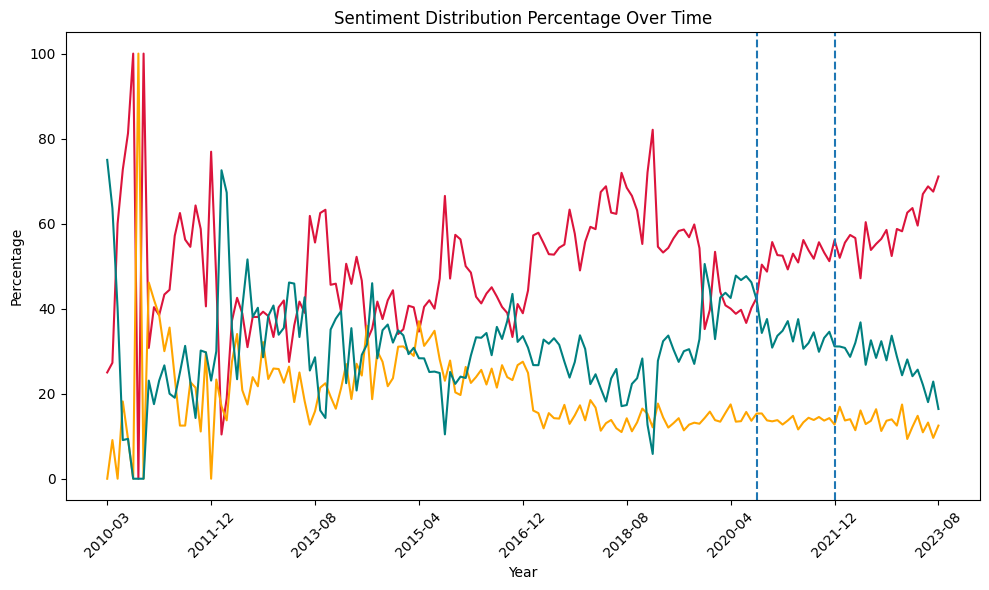

In [125]:
matchdating['at'] = pd.to_datetime(matchdating['at'])
matchdating['month_year'] = matchdating['at'].dt.to_period('M')
sentiment_percentages = matchdating.groupby(['month_year', 'Roberta Prediction']).size().unstack(fill_value=0)
sentiment_percentages = sentiment_percentages.div(sentiment_percentages.sum(axis=1), axis=0) * 100


custom_colors = {'negative': 'crimson', 'neutral': 'orange', 'positive': 'teal'}

# Convert Period objects to strings
sentiment_percentages.index = sentiment_percentages.index.astype(str)

# Plotting
plt.figure(figsize=(10, 6))
for sentiment, color in custom_colors.items():
    plt.plot(sentiment_percentages.index, sentiment_percentages[sentiment], color=color, label=sentiment)

plt.axvline(x='2020-09', linestyle='--')
plt.axvline(x='2021-12', linestyle='--')

plt.grid(False)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution Percentage Over Time')
plt.xticks(rotation=45)

plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

In [126]:
start_date = pd.Period('2020-09', freq='M')
end_date = pd.Period('2021-12', freq='M')
match_covid = matchdating[(matchdating['month_year'] >= start_date) & (matchdating['month_year'] <= end_date)]

### Tinder

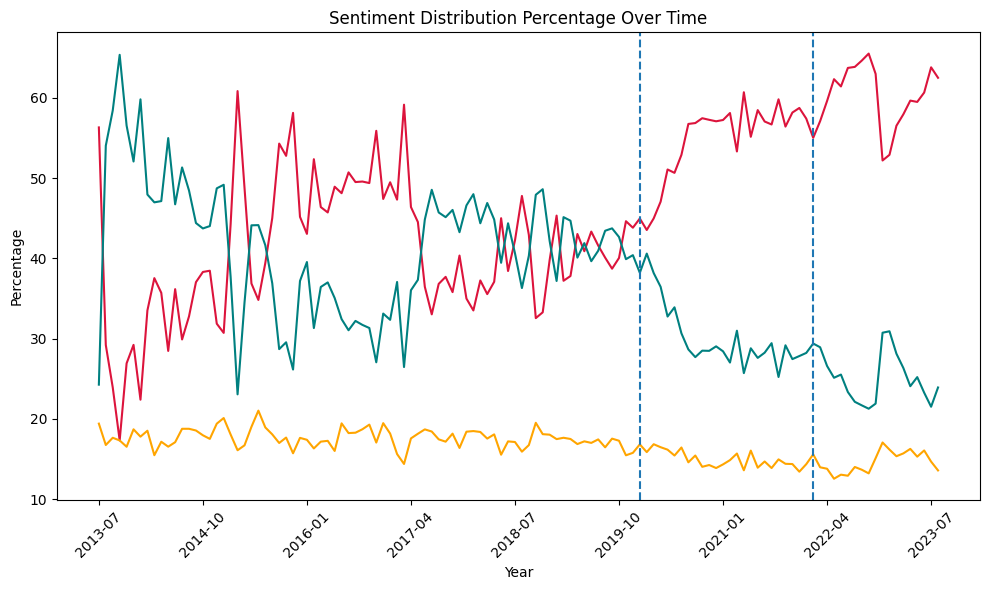

In [6]:
tinder['at'] = pd.to_datetime(tinder['at'])
tinder['month_year'] = tinder['at'].dt.to_period('M')
sentiment_percentages = tinder.groupby(['month_year', 'Roberta Prediction']).size().unstack(fill_value=0)
sentiment_percentages = sentiment_percentages.div(sentiment_percentages.sum(axis=1), axis=0) * 100


custom_colors = {'negative': 'crimson', 'neutral': 'orange', 'positive': 'teal'}

# Convert Period objects to strings
sentiment_percentages.index = sentiment_percentages.index.astype(str)

# Plotting
plt.figure(figsize=(10, 6))
for sentiment, color in custom_colors.items():
    plt.plot(sentiment_percentages.index, sentiment_percentages[sentiment], color=color, label=sentiment)

plt.axvline(x='2020-01', linestyle='--')
plt.axvline(x='2022-02', linestyle='--')

plt.grid(False)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution Percentage Over Time')
plt.xticks(rotation=45)

plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

In [7]:
start_date = pd.Period('2020-01', freq='M')
end_date = pd.Period('2022-02', freq='M')
tinder_covid = tinder[(tinder['month_year'] >= start_date) & (tinder['month_year'] <= end_date)]

# Custom Q&A Model

In [8]:
import os

In [9]:
openai_api_key = ''
os.environ["OPENAI_API_KEY"] = openai_api_key

In [10]:
pip install openai

In [11]:
!pip install -U langchain

In [12]:
pip install chromadb

In [13]:
pip install tiktoken

In [14]:
import langchain
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import CharacterTextSplitter
from langchain import OpenAI, VectorDBQA, OpenAI
from langchain.llms import OpenAIChat
from langchain.document_loaders import DirectoryLoader
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI

In [15]:
langchain.document_loaders.DataFrameLoader??

In [16]:
dir(langchain.document_loaders)

['AZLyricsLoader',
 'AcreomLoader',
 'AirbyteCDKLoader',
 'AirbyteGongLoader',
 'AirbyteHubspotLoader',
 'AirbyteJSONLoader',
 'AirbyteSalesforceLoader',
 'AirbyteShopifyLoader',
 'AirbyteStripeLoader',
 'AirbyteTypeformLoader',
 'AirbyteZendeskSupportLoader',
 'AirtableLoader',
 'AmazonTextractPDFLoader',
 'ApifyDatasetLoader',
 'ArcGISLoader',
 'ArxivLoader',
 'AsyncChromiumLoader',
 'AsyncHtmlLoader',
 'AzureBlobStorageContainerLoader',
 'AzureBlobStorageFileLoader',
 'BSHTMLLoader',
 'BibtexLoader',
 'BigQueryLoader',
 'BiliBiliLoader',
 'BlackboardLoader',
 'Blob',
 'BlobLoader',
 'BlockchainDocumentLoader',
 'BraveSearchLoader',
 'BrowserlessLoader',
 'CSVLoader',
 'ChatGPTLoader',
 'CoNLLULoader',
 'CollegeConfidentialLoader',
 'ConcurrentLoader',
 'ConfluenceLoader',
 'CubeSemanticLoader',
 'DataFrameLoader',
 'DatadogLogsLoader',
 'DiffbotLoader',
 'DirectoryLoader',
 'DiscordChatLoader',
 'DocugamiLoader',
 'Docx2txtLoader',
 'DropboxLoader',
 'DuckDBLoader',
 'EmbaasBlobLoad

### Bumble

In [38]:
bumble_covid = bumble_covid[['content','score']]
loader = langchain.document_loaders.DataFrameLoader(bumble_covid, 'content')

In [39]:
documents = loader.load()
len(documents)

36950

In [40]:
text_splitter = CharacterTextSplitter(chunk_size=36950, chunk_overlap=100)

In [41]:
texts = text_splitter.split_documents(documents)

In [43]:
embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)

In [44]:
docsearch = Chroma.from_documents(texts, embeddings)

In [60]:
qa = RetrievalQA.from_chain_type(llm=OpenAI(temperature=0.3), chain_type="stuff", retriever = docsearch.as_retriever())

In [67]:
query = "What people think about the bumble?"
qa.run(query)

' People think that bumble is awesome and the best.'

In [68]:
query = "What are the issues people face while using the app?"
qa.run(query)

' People have experienced privacy related issues, technical difficulties, bugs, and other problems while using the app.'

In [69]:
query = "What are the negative sentiments reflected in the bumble dating app?"
qa.run(query)

' The negative sentiments reflected in the Bumble dating app are that it is manipulative, has low numbers of users, is designed to make men feel rejected, and does not take action against aggressive or rude messages.'

In [72]:
query = "Why people are feeling the app is manipulative?"
qa.run(query)

' People are feeling the app is manipulative because it controls their timing, dating profile, and other aspects of their experience, and it is biased, making it difficult to connect with genuine people.'

In [74]:
query = "Why men feel rejected?"
qa.run(query)

' Men may feel rejected because women appear to be ignoring nice guys, not showing them love, not seeing many decent men, and being down right hostile to them.'

In [78]:
query = "What are the technical concerns people raised while using the app?"
qa.run(query)

' People have raised privacy-related and technical issues while using the app, such as technical difficulties, user-unfriendliness, and headaches.'

In [79]:
query = "Why people are having headaches while using the app?"
qa.run(query)

' People are having headaches while using the app because the app is not working properly, is flawed, and is lagging.'

In [81]:
query = "Explain the technical difficulties people are facing while using the app?"
qa.run(query)

' People are experiencing difficulty with pictures failing to load, not receiving notifications, and not being able to send messages. They also report that the app is not as reliable as it used to be.'

In [82]:
query = "Explain why people think the app is not user friendly?"
qa.run(query)

' People think the app is not user friendly because they find it difficult to use, not easy to use, and not intuitive. They also think the developers are greedy and have not put enough effort into making the app user friendly.'

In [83]:
query = "Explain why people think the developers are greedy?"
qa.run(query)

' People think the developers are greedy because they are focused on making money and not understanding the consequences of their actions.'

### Hinge

In [101]:
hinge_covid = hinge_covid[['content','score']]
loader = langchain.document_loaders.DataFrameLoader(hinge_covid, 'content')

In [102]:
documents = loader.load()
len(documents)

15314

In [103]:
text_splitter = CharacterTextSplitter(chunk_size=15314, chunk_overlap=100)

In [104]:
texts = text_splitter.split_documents(documents)

In [105]:
embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)

In [106]:
docsearch = Chroma.from_documents(texts, embeddings)

In [107]:
qa = RetrievalQA.from_chain_type(llm=OpenAI(temperature=0.3), chain_type="stuff", retriever = docsearch.as_retriever())

In [108]:
query = "What people think about the hinge?"
qa.run(query)

' People seem to think that the hinge is good.'

In [109]:
query = "What are the issues people face while using the app?"
qa.run(query)

' People have reported privacy related issues and technical difficulties, such as bugs and problems.'

In [110]:
query = "What are the negative sentiments reflected in the hinge dating app?"
qa.run(query)

' The negative sentiments reflected in the Hinge dating app include slow performance, a serious paywall, sexism, ghosting, and a low quality userbase.'

In [111]:
query = "Why people feel a serious paywall while using the dating app?"
qa.run(query)

' People feel a serious paywall while using the dating app because the app has paywall after paywall and poor filtering.'

In [112]:
query = "Why people feel sexism while using the dating app?"
qa.run(query)

' People feel sexism while using the dating app because it is set up in a way that reinforces sexist stereotypes and attitudes.'

In [113]:
query = "Why exactly people feel the hinge dating app reinforces sexist stereotypes and attitudes?"
qa.run(query)

" People feel that the Hinge dating app reinforces sexist stereotypes and attitudes because it takes a woman's side blindly and does not enforce its Terms of Service equally. Additionally, it is designed to promote inequality in favour of women throughout the user experience."

In [114]:
query = "What are the positive sentiments reflected in the hinge dating app?"
qa.run(query)

' People have expressed positive sentiments about the hinge dating app, such as that it provides a different perspective from conventional dating apps, takes the pressure off from having the perfect profile, brings the conversation back to a more simple time, and that they have met some great people and enjoyed the experience.'

In [115]:
query = "Explain the technical difficulties people are facing while using the app"
qa.run(query)

' People are experiencing difficulty with the app loading pictures, even when they have a high speed internet connection. There are also other technical issues that make the app frustrating to use.'

In [116]:
query = "Explain why people are frustrated while using the app"
qa.run(query)

' People are frustrated while using the app because it is not easy to use, has flaws, and does not meet their expectations.'

In [120]:
query = "Explain why people think the app is flawed while using"
qa.run(query)

" People think the app is flawed because it has issues and is outstandingly glitchy, and they don't think it actually works."

In [121]:
query = "Explain why people think the app is not working"
qa.run(query)

' People think the app is not working because it is not functioning properly even when there is a good connection.'

### Match

In [127]:
match_covid = match_covid[['content','score']]
loader = langchain.document_loaders.DataFrameLoader(match_covid, 'content')

In [128]:
documents = loader.load()
len(documents)

9213

In [129]:
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=100)

In [130]:
texts = text_splitter.split_documents(documents)

In [131]:
embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)

In [132]:
docsearch = Chroma.from_documents(texts, embeddings)

In [133]:
qa = RetrievalQA.from_chain_type(llm=OpenAI(temperature=0.3), chain_type="stuff", retriever = docsearch.as_retriever())

In [134]:
query = "What people think about the match?"
qa.run(query)

' People think the match is great so far.'

In [135]:
query = "What are the negative sentiments reflected in the match dating app?"
qa.run(query)

' The negative sentiments reflected in the match dating app are very bad, horrible, and pathetic.'

In [137]:
query = "Why people think the match dating app are very bad, horrible, and pathetic?"
qa.run(query)

" I don't know."

In [138]:
query = "What makes people think negative about match dating app?"
qa.run(query)

' People think negatively about the match dating app because they have had bad experiences with it, such as it being poor, very bad, or horrible.'

In [139]:
query = "What bad experience people are facing while using match dating app?"
qa.run(query)

' People are having a horrible experience with the match dating app.'

In [140]:
query = "What are the top issues people are facing while using match dating app?"
qa.run(query)

' The top issues people are facing while using match dating app are bad UI, not getting matches after upgrading to premium, matches making shortlists, most accounts being bots or fake accounts, having to use premium after one day of usage, bad customer support, and privacy concerns.'

In [141]:
query = "What UI issues people are facing while using match dating app?"
qa.run(query)

' People are facing issues with the new UI, such as not being able to see photos properly and not getting notifications for new messages.'

In [147]:
query = "What privacy issues people are facing while using match dating app?"
qa.run(query)

' People have reported that the app collects their private data, including conversations, photos, and location, and may use it or sell it outside of the app. Additionally, people are suspicious that the app may be manipulating matches and showcasing profiles for a fee.'

In [151]:
query = "Why people think the dating app is showcasing profiles for a fee?"
qa.run(query)

' People think the dating app is showcasing profiles for a fee because they are only able to match with "outstanding profiles" if they pay.'

In [152]:
query = "What people think about filters while using the dating app?"
qa.run(query)

' People think that the filters on the app are helpful and make it easier to find matches that meet their dating preferences. They also think that the app is better than other dating apps, like Tinder, Plenty of Fish, and OkCupid.'

In [150]:
query = "What people think about premium subscription while using the dating app?"
qa.run(query)

' People generally think that the premium subscription is reasonably priced and can get them extra features that make the app nicer, but it is actually functional without it.'

### Tinder

In [19]:
tinder_covid = tinder_covid[['content','score']]
tinder_covid = tinder_covid.sample(10000)
loader = langchain.document_loaders.DataFrameLoader(tinder_covid, 'content')

In [20]:
documents = loader.load()
len(documents)

10000

In [21]:
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=100)

In [22]:
texts = text_splitter.split_documents(documents)

In [23]:
embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)

In [24]:
docsearch = Chroma.from_documents(texts, embeddings)

In [25]:
qa = RetrievalQA.from_chain_type(llm=OpenAI(temperature=0.3), chain_type="stuff", retriever = docsearch.as_retriever())

In [26]:
query = "What people think about the tinder?"
qa.run(query)

' People seem to think that Tinder is awesome and they love using it.'

In [27]:
query = "What are the negative sentiments reflected in the match dating app?"
qa.run(query)

' The negative sentiments reflected in the match dating app are that it is very bad, the most miserable, and the worst.'

In [28]:
query = "Explain the reasons behind negative sentiment of users."
qa.run(query)

' Users have expressed negative sentiment towards the app because they feel the app is intrusive, as it asks too many questions when people want to delete their account. They also feel the app is restrictive, as it does not allow people to read profiles longer than a sentence. Additionally, users feel the app is damaging to their mental health, as they feel pressured to use the app because everyone else is.'

In [29]:
query = "Why tinder is affecting mental health?"
qa.run(query)

' Tinder is affecting mental health because it does not provide the same level of success as other apps. People often don\'t receive enough likes within a time period and are "ghosted" by the app, which can be damaging to self-esteem.'

In [31]:
query = "What are the top concerns people have while using the tinder app?"
qa.run(query)

' People have concerns about the people they are interacting with, the potential for robots or fake profiles, and the possibility of being tricked into buying Tinder Gold.'

In [32]:
query = "Why people think they are tricked into buying tinder gold while using the tinder app?"
qa.run(query)

' People think they are tricked into buying Tinder Gold because the app shows them fake people that liked them in order to get them to buy the subscription. They also think that the people on the app are not looking for love or a date, but instead want money or to gain clout on other social media.'

In [34]:
query = "What technical issues people are facing while using the tinder app?"
qa.run(query)

' People are having difficulty logging in, the app is not responding, and it is not working well.'

In [36]:
query = "Why people feel restrictive while using the app?"
qa.run(query)

' People feel restrictive while using the app because they are not able to enjoy it due to people blocking them, not using the app for what it was designed for, and not being able to easily delete their accounts.'

In [39]:
query = "Why people are concerned with receiving likes while using the app?"
qa.run(query)

" People are concerned with receiving likes while using the app because the app intentionally controls the ability to match with people. Tinder allows users to see how many likes they have, but then does not run those likes through their feed, instead encouraging users to pay a fee for the service. The app also intends to match users with inconvenient partners to prevent them from developing lasting relationships, and preys on users' vulnerability to make more money."

In [40]:
query = "Why people feel vulnerable while using the app?"
qa.run(query)

" People feel vulnerable while using the app because it is programmed to make them feel good for a couple of days and then start to slow their matches down. The app also chooses who their profile is shown to, which can make people feel like they don't have control over their own success on the app."